<center><span style="color: rgb(119, 0, 200); font-size: 36px;">  ___________________________________________________________________ </span><center><br>
<center><span style="color: rgb(119, 0, 200); font-size: 36px;">  ASSIGNMENT TIME SERIES 1023   <br>  <br> </span></center>
<center><span style="color: rgb(174, 55, 255); font-size: 28px;">  GONCALO BERNARDO <br> FEB-2024 </span></center>
<center><span style="color: rgb(119, 0, 200); font-size: 36px;">  ___________________________________________________________________ </span></center>

__________________
# LIST OF CONTENTS
__________________

<div>
<ul>
<li style="font-size:24px">PROJECT DESCRIPTION</li>
<li style="font-size:24px">IMPORT LABRIARIES AND DATASET</li>

<li style="font-size:24px">A. DATA UNDERSTANDING</li>
<ul>
<li style="font-size:22px">A.1 UNIVARIATE ANALYSIS</li>
    <ul>
    <li style="font-size:20px">A.1.1 Dataset size (in-memory size, number of registers and attributes, etc.)</li>
    <li style="font-size:20px">A.1.2 Direct visualization of the data (head)</li>
    <li style="font-size:20px">A.1.3 Type of variables available (numeric, categorical)</li>
    <li style="font-size:20px">A.1.4 Descriptive statistics (mean values, dispersion, percentiles, etc.)</li>
    <li style="font-size:20px">A.1.5 Number of null values</li>
    <li style="font-size:20px">A.1.6 Timeseries visualizations (Total Invoice and Quantities)</li>
    <li style="font-size:20px">A.1.7 Customers by country (Top 10)</li>
    </ul>
    <li style="font-size:22px">A.2 MULTIVARIATE ANALYSIS</li>
    <ul>
    <li style="font-size:20px">A.2.1 Plot the total invoice by each country (top 4)</li>
    <li style="font-size:20px">A.2.2 Analysis of the customers</li>
    <li style="font-size:20px">A.2.3 Identification of outliers</li>
    </ul>
</ul>

<li style="font-size:24px">B. DATA CLEANING</li>
<ul>
<li style="font-size:22px">B.1  Dealing with variables types / Imputation of null values (zero, mean, fashion, fixed value, etc.) or deletion of records containing them</li>
    <ul>
    <li style="font-size:20px">B.1.1  Categorical</li>
    <li style="font-size:20px">B.1.2  Numerical</li>
    </ul>
    <li style="font-size:22px">B.2 Handling outliers or delete records that contain outliers</li>
</ul>

<li style="font-size:24px">C. DATA TRANSFORMATION</li>
<li style="font-size:24px">D. TIME SERIES MODELLING</li>

<ul>
<li style="font-size:22px">D.1 Additive Model</li>
    <ul>
    <li style="font-size:20px">D.1.1 Autocorrelation and  Partial Autocorrelation</li>
    </ul>
    <li style="font-size:22px">D.2 Stationary Processes</li>
    <li style="font-size:22px">D.3 Time Series Evaluation Metrics</li>
    <li style="font-size:22px">D.4 Autorreregresive (AR) and Moving Average (MA)</li>
    <ul>
    <li style="font-size:20px">D.4.1 Stationarity test</li>
    <li style="font-size:20px">D.4.2 Fit the Model</li>
    <li style="font-size:20px">D.4.3 Prediction</li>
    <li style="font-size:20px">D.4.4 Evaluation</li>
    <li style="font-size:20px">D.4.5 Auto ARIMA</li>
    </ul>
    <li style="font-size:22px">D.5 Prophet</li>
    <ul>
    <li style="font-size:20px">D.5.1 Fit the Model</li>
    <li style="font-size:20px">D.5.2 Forecasts</li>
    <li style="font-size:20px">D.5.3 Plot the results</li>
    <li style="font-size:20px">D.5.4 Descomposing the results</li>
    <li style="font-size:20px">D.5.5 Evaluating the predictions: train and test split</li>
    <li style="font-size:20px">D.5.6 Adding Multiplicative Seasonality</li>
    <li style="font-size:20px">D.5.7 Adding Calendar Specifics</li>
    <li style="font-size:20px">D.5.8 Comparing holidays and non-holidays</li>
    </ul>
</ul>
<li style="font-size:24px">E. CONCLUSIONS</li>
</ul>
</div>




__________________
# PROJECT DESCRIPTION
__________________

<p>All Sales Inc.⚡️, a family-owned company specialised in online retail commerce had conducted a thorough market analysis using business rules, and now they pretend to expand company's capital. </p>
<p>However to go foward, they need to know what the future value of their company could be expressed by their expected profits and they want you to help address this issue. The goal is to predict their daily profit over the next three months.</p>
<p>The company has provided a representative sample of sales from the past year (December/2022 until December/2023), to construct a suitable metric to carry out the predictions, and selecting predictive model that best suits the objective.</p>
<p>The present report shows the most relevant aspects related to the evolution of All Sales Inc.⚡ profits during the last fiscal year and some profit predictions for the next quarter (90 days since the last reported day) </p>

# IMPORT LABRIARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
import random
import skimpy as sk

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.express as px

rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-v0_8')

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)

retail_sales_df = pd.read_csv("online_retail_sales.csv", parse_dates=["InvoiceDate"], index_col = 'InvoiceDate', keep_date_col=True)
retail_sales_df.index.name = "DateIndex"
retail_sales_df["InvoiceDate"] = retail_sales_df.index

c:\Users\gonca\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


__________________
# A. DATA UNDERSTANDING
__________________

__________________
## A.1 UNIVARIATE ANALYSIS
__________________

### A.1.1 Dataset size (in-memory size, number of registers and attributes, etc.)

In [2]:
print(f"Size of dataframe: {retail_sales_df.shape[0]}")
print(f"# unique rows: {retail_sales_df.duplicated().shape[0]}")

Size of dataframe: 541909
# unique rows: 541909


### A.1.2 Direct visualization of the data (head)

In [3]:
retail_sales_df.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate
DateIndex,,,,,,,,
2022-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2022-12-01 08:26:00
2022-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2022-12-01 08:26:00
2022-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2022-12-01 08:26:00
2022-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2022-12-01 08:26:00
2022-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2022-12-01 08:26:00


### A.1.3 Type of variables available (numeric, categorical)

In [4]:
retail_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2022-12-01 08:26:00 to 2023-12-09 12:50:00
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      541909 non-null  object        
 7   InvoiceDate  541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


### A.1.4 Descriptive statistics (mean values, dispersion, percentiles, etc.)

In [5]:
retail_sales_df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceDate
count,541909.000000,541909.000000,406829.000000,541909
mean,9.552250,4.611114,15287.690570,2023-07-04 13:34:57.156387072
min,-80995.000000,-11062.060000,12346.000000,2022-12-01 08:26:00
25%,1.000000,1.250000,13953.000000,2023-03-28 11:34:00
50%,3.000000,2.080000,15152.000000,2023-07-19 17:17:00
75%,10.000000,4.130000,16791.000000,2023-10-19 11:27:00
max,80995.000000,38970.000000,18287.000000,2023-12-09 12:50:00
std,218.081158,96.759853,1713.600303,NaN


In [6]:
retail_sales_df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


### A.1.5 Number of null values 

In [7]:
df_nulls=pd.DataFrame(retail_sales_df.isna().any())
size_=retail_sales_df.shape[0]*100

null_count_df=pd.DataFrame(columns = ['Field', 'Counting', 'Percentage'])

for idx, row in df_nulls.iterrows():
    if df_nulls.loc[idx].values[0]:
        n_=retail_sales_df[retail_sales_df[idx].isna()].shape[0]
        null_count_df.loc[len(null_count_df.index)] = [idx, n_, round(n_/size_*100,2)]  

null_count_df.head(10)

,Field,Counting,Percentage
0,Description,1454,0.00
1,CustomerID,135080,0.25


### A.1.6 Timeseries visualizations (Total Invoice and Quantities)

In [8]:
retail_sales_df["InvoiceDate_"]=pd.DatetimeIndex(retail_sales_df['InvoiceDate']).strftime('%m/%d/%Y')
retail_sales_df["InvoiceDate_"]=pd.to_datetime(retail_sales_df["InvoiceDate_"], format='%m/%d/%Y')
retail_sales_df["InvoiceWeekDay"]=pd.to_datetime(retail_sales_df["InvoiceDate"]).dt.day_name()
retail_sales_df['FirstWeekDay'] = pd.DatetimeIndex(retail_sales_df['InvoiceDate'] - retail_sales_df['InvoiceDate'].dt.weekday * np.timedelta64(1, 'D')).strftime('%m/%d/%Y')
retail_sales_df["FirstWeekDay"]=pd.to_datetime(retail_sales_df["FirstWeekDay"], format='%m/%d/%Y')
retail_sales_df["TotalInvoice"]=retail_sales_df["UnitPrice"]*retail_sales_df["Quantity"]

retail_sales_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceDate_,InvoiceWeekDay,FirstWeekDay,TotalInvoice
DateIndex,,,,,,,,,,,,
2022-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2022-12-01 08:26:00,2022-12-01,Thursday,2022-11-28,15.30
2022-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2022-12-01 08:26:00,2022-12-01,Thursday,2022-11-28,20.34
2022-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2022-12-01 08:26:00,2022-12-01,Thursday,2022-11-28,22.00
2022-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2022-12-01 08:26:00,2022-12-01,Thursday,2022-11-28,20.34
2022-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2022-12-01 08:26:00,2022-12-01,Thursday,2022-11-28,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2023-12-09 12:50:00,2023-12-09,Saturday,2023-12-04,10.20
2023-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2023-12-09 12:50:00,2023-12-09,Saturday,2023-12-04,12.60
2023-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2023-12-09 12:50:00,2023-12-09,Saturday,2023-12-04,16.60


### FUNCTIONS TO CREATE PLOTS

In [9]:
# Plot time series by eachday, weekday, year-month or month
def plot_time_series(feature, df, reorder_type):
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots

    fig = make_subplots(rows=3, cols=1, subplot_titles=("TotalInvoice", "TotalInvoice (Mean)", "Quantity"))

    new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    new_order_ = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']
    data_plot = df[[feature,"TotalInvoice"]].groupby(feature).sum()
    if reorder_type == 'month':
        data_plot = data_plot.reindex(new_order, axis=0)
    if reorder_type == 'weekday':
        data_plot = data_plot.reindex(new_order_, axis=0)

    fig.add_trace(
        go.Scatter(x=data_plot.index,y=data_plot["TotalInvoice"]), row=1, col=1
    )

    data_plot = df[[feature,"TotalInvoice"]].groupby(feature).mean()
    if reorder_type == 'month':
        data_plot = data_plot.reindex(new_order, axis=0)
    if reorder_type == 'weekday':
        data_plot = data_plot.reindex(new_order_, axis=0)

    fig.add_trace(
        go.Scatter(x=data_plot.index,y=data_plot["TotalInvoice"]), row=2, col=1
    )

    data_plot = df[[feature,"Quantity"]].groupby(feature).sum()
    if reorder_type == 'month':
        data_plot = data_plot.reindex(new_order, axis=0)
    if reorder_type == 'weekday':
        data_plot = data_plot.reindex(new_order_, axis=0)
        
    fig.add_trace(
        go.Scatter(x=data_plot.index,y=data_plot["Quantity"]), row=3, col=1
    )

    fig.update_layout(height=1200, width=1500, title_text=feature, showlegend=False)
    fig.show()

# Plot Invoice By each Country
def plot_invoice_by_country(df):

    invoice_by_coutry = df[["Country","TotalInvoice"]].groupby("Country").sum().sort_values(by="TotalInvoice",ascending=False)
    invoice_by_coutry["TotalInvoice_"]=round(invoice_by_coutry["TotalInvoice"]/invoice_by_coutry["TotalInvoice"].sum()*100,1)
    invoice_by_coutry["Country_"]=invoice_by_coutry.index

    plt.figure(figsize=(10,8))
    plt.barh(invoice_by_coutry["Country_"].head(10), invoice_by_coutry["TotalInvoice_"].head(10))
    plt.ylabel("Countries")
    plt.xlabel("Total Invoice (%)")
    plt.title("Total Invoice by Country")
    
    for index, value in enumerate(invoice_by_coutry["TotalInvoice_"].head(10)):
        plt.text(value, index, str(value))
    
    plt.show()

# Plot n. Customers By each Country
def plot_people_by_country(df):

    people_by_coutry = df[["Country","TotalInvoice"]].groupby("Country").count().sort_values(by="TotalInvoice",ascending=False)
    people_by_coutry["TotalInvoice_"]=round(people_by_coutry["TotalInvoice"]/people_by_coutry["TotalInvoice"].sum()*100,1)
    people_by_coutry["Country_"]=people_by_coutry.index

    plt.figure(figsize=(10,8))
    plt.barh(people_by_coutry["Country_"].head(10), people_by_coutry["TotalInvoice_"].head(10))
    plt.ylabel("Countries")
    plt.xlabel("Total Customers (%)")
    plt.title("Total Customer by Country")
    
    for index, value in enumerate(people_by_coutry["TotalInvoice_"].head(10)):
        plt.text(value, index, str(value))
    
    plt.show()

# Perform a quick comparing among the countries with more clients
def plot_time_series_by_country(feature, df, countries):
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots

    fig = make_subplots(rows=1, cols=4, subplot_titles=(countries[0], countries[1], countries[2], countries[3]))

    for idx, country in enumerate(countries):
        data_plot = df[df["Country"]==country]
        data_plot = data_plot[[feature,"TotalInvoice"]].groupby(feature).mean()
        fig.add_trace(
            go.Scatter(x=data_plot.index,y=data_plot["TotalInvoice"]), row=1, col=idx+1
        )

    fig.update_layout(height=400, width=2000, title_text=feature, showlegend=False)
    fig.show()

# Plot total invoice By each customer
def plot_invoice_by_customer(df):

    invoice_by_customer = df[df["CustomerID"].notna()]
    invoice_by_customer = invoice_by_customer[["CustomerID","TotalInvoice"]].groupby("CustomerID").sum().sort_values(by="TotalInvoice",ascending=False)
    invoice_by_customer["TotalInvoice_"]=invoice_by_customer["TotalInvoice"]
    invoice_by_customer["CustomerID_"]=invoice_by_customer.index
    invoice_by_customer["CustomerID_"]=invoice_by_customer["CustomerID_"].apply(str)

    plt.figure(figsize=(10,8))
    plt.barh(invoice_by_customer["CustomerID_"].head(10), invoice_by_customer["TotalInvoice_"].head(10))
    plt.ylabel("Customer")
    plt.xlabel("Total Invoice")
    plt.title("Total Invoice by Customer")
    
    for index, value in enumerate(invoice_by_customer["TotalInvoice_"].head(10)):
        plt.text(value, index, str(value))
    
    plt.show()

# Plot total orders By each customer
def plot_orders_by_customer(df):

    orders_by_customer = df[df["CustomerID"].notna()]
    orders_by_customer = orders_by_customer[["CustomerID","InvoiceNo","TotalInvoice"]].groupby(["InvoiceNo"]).agg({"TotalInvoice":"count", "CustomerID":"max"}).sort_values(by="TotalInvoice",ascending=False)
    orders_by_customer = pd.DataFrame(orders_by_customer["CustomerID"].value_counts())
    orders_by_customer["CustomerID_"] = orders_by_customer.index
    orders_by_customer["CustomerID_"] = orders_by_customer["CustomerID_"].apply(str)

    plt.figure(figsize=(10,8))
    plt.barh(orders_by_customer["CustomerID_"].head(10), orders_by_customer["count"].head(10))
    plt.ylabel("Customer")
    plt.xlabel("Total orders")
    plt.title("Total Orders by Customer")
    
    for index, value in enumerate(orders_by_customer["count"].head(10)):
        plt.text(value, index, str(value))
    
    plt.show()

In [10]:
plot_time_series("InvoiceDate_",retail_sales_df,"no reorder")

In [11]:
plot_time_series("InvoiceWeekDay", retail_sales_df, "weekday")

In [12]:
retail_sales_week_df = retail_sales_df[["FirstWeekDay","TotalInvoice"]].groupby(["FirstWeekDay"]).sum()
px.line(x=retail_sales_week_df.index,y=retail_sales_week_df["TotalInvoice"])


### A.1.7 Customers by country (Top 10)

<p>From the visualizations below, one can see that 91% of the total customers are from UK.</p>

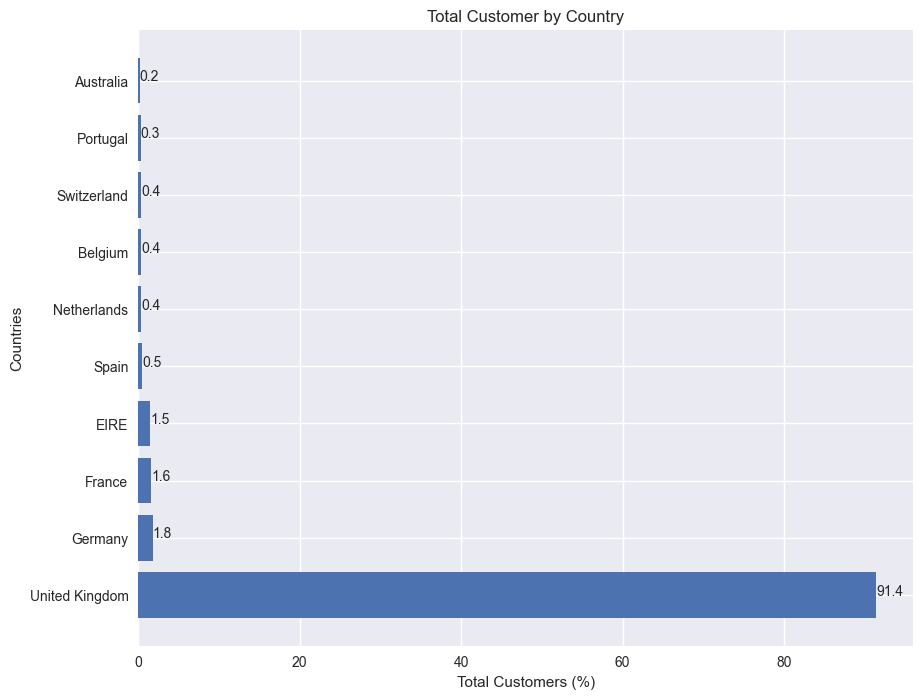

There are in total 38 countries in the dataset!


In [13]:
plot_people_by_country(retail_sales_df)
print(f"There are in total {retail_sales_df['Country'].nunique()} countries in the dataset!")

__________________
## A.2 MULTIVARIATE ANALYSIS
__________________

### A.2.1 Plot the total invoice by each country (top 10)

<p>From the visualizations below, one can see that 84% of the total invoice comes from UK customers.</p>

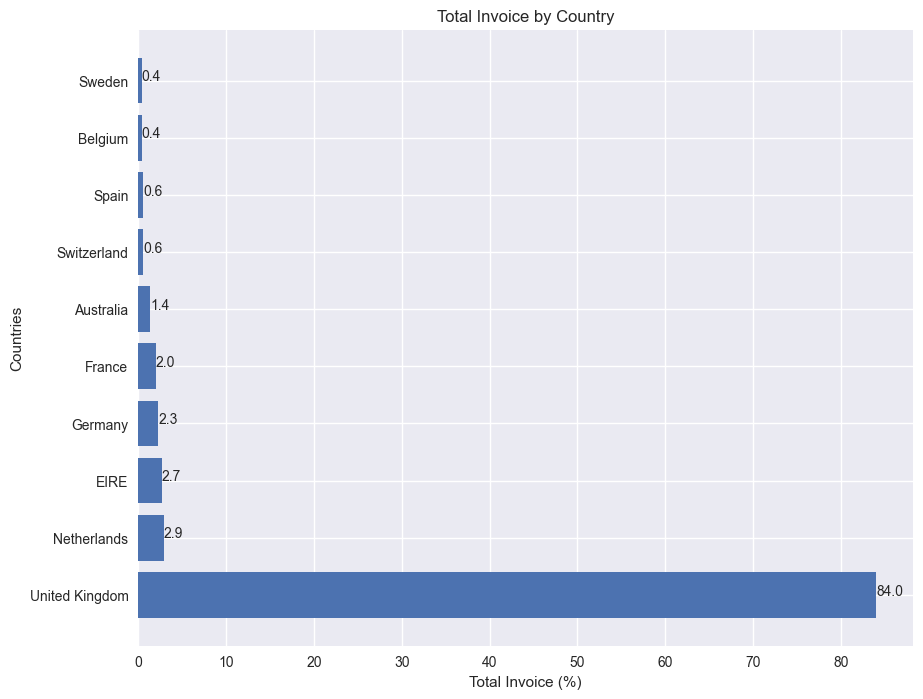

In [14]:
plot_invoice_by_country(retail_sales_df)

In [15]:
plot_time_series_by_country("FirstWeekDay",retail_sales_df, ["United Kingdom","Netherlands","EIRE","Germany"])


### A.2.2 Analysis of the customers

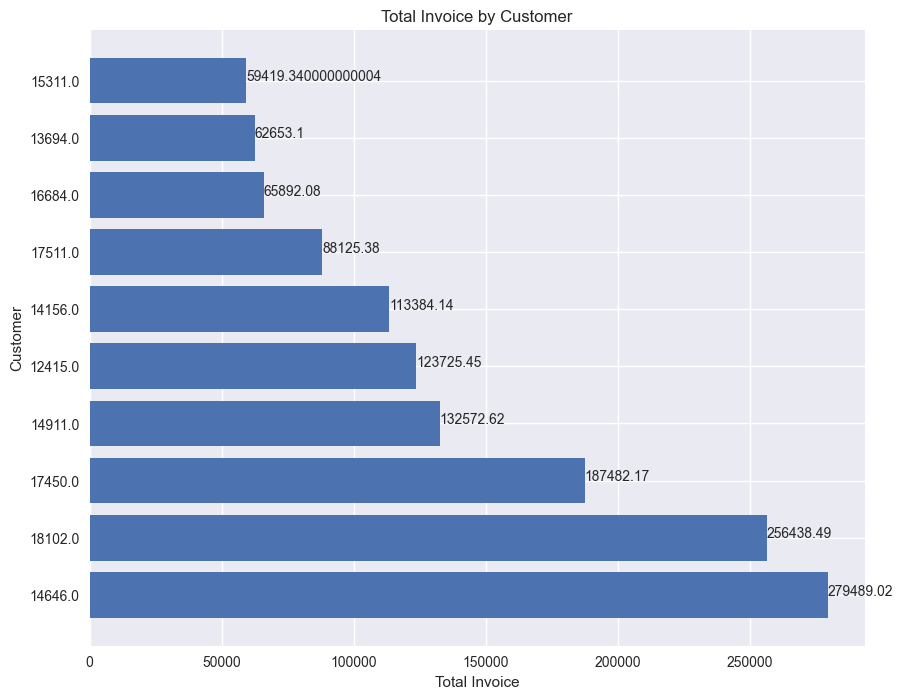

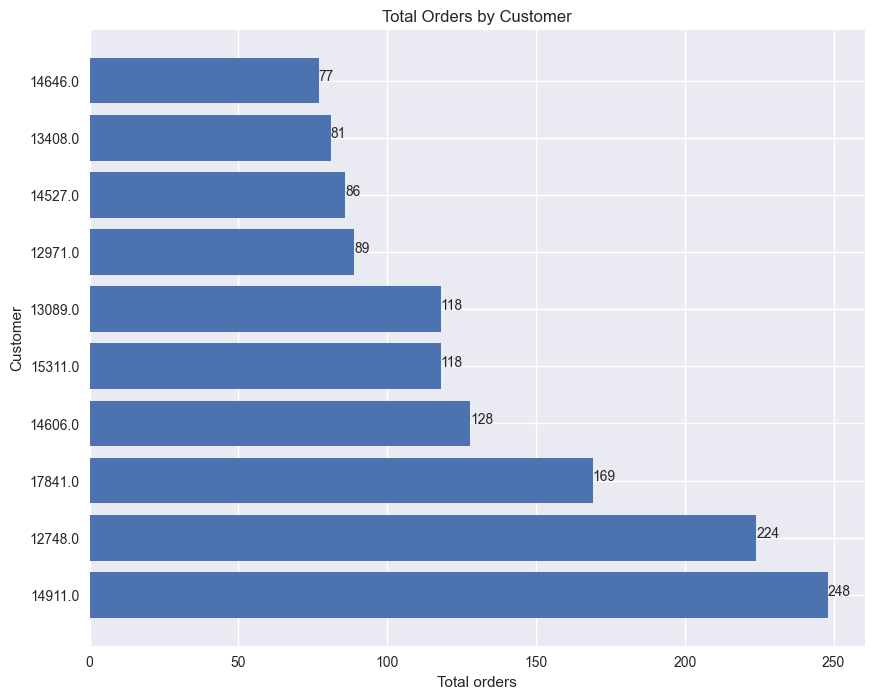

In [16]:
plot_invoice_by_customer(retail_sales_df)
plot_orders_by_customer(retail_sales_df)

### A.2.3 Identification of outliers

In [17]:
df_outliers = retail_sales_df.loc[:, retail_sales_df.columns.isin(['Quantity','TotalInvoice','UnitPrice'])]
statistics_all = df_outliers.describe().T
statistics_outliers = statistics_all[['mean','25%','50%','75%']]

print(f"UnitPrice: Min: {statistics_all.loc['UnitPrice','min']} ; Max: {statistics_all.loc['UnitPrice','max']}")
print(f"Quantity: Min: {statistics_all.loc['Quantity','min']} ; Max: {statistics_all.loc['Quantity','max']}")
print(f"TotalInvoice: Min: {statistics_all.loc['TotalInvoice','min']} ; Max: {statistics_all.loc['TotalInvoice','max']}")

statistics_outliers["severe_low"] = statistics_all["25%"]-3*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["moderate_low"] = statistics_all["25%"]-1.5*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["moderate_high"] = statistics_all["75%"]+1.5*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["severe_high"] = statistics_all["75%"]+3*(statistics_all["75%"]-statistics_all["25%"])

count_outliers = pd.DataFrame(index=[statistics_outliers.index],columns=["n_severe_low","n_moderate_low","n_normal","n_moderate_high","n_severe_high","n_na"])
count_outliers = count_outliers.fillna(0)

for col in df_outliers:
    count_outliers.loc[col,"n_severe_low"] = df_outliers[df_outliers[col]<=statistics_outliers.loc[col]["severe_low"]].shape[0]
    count_outliers.loc[col,"n_moderate_low"] = df_outliers[(df_outliers[col]>statistics_outliers.loc[col]["severe_low"]) & (df_outliers[col]<statistics_outliers.loc[col]["moderate_low"])].shape[0]
    count_outliers.loc[col,"n_normal"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["moderate_low"]) & (df_outliers[col]<statistics_outliers.loc[col]["moderate_high"])].shape[0]
    count_outliers.loc[col,"n_moderate_high"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["moderate_high"]) & (df_outliers[col]<statistics_outliers.loc[col]["severe_high"])].shape[0]
    count_outliers.loc[col,"n_severe_high"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["severe_high"]) ].shape[0]
    count_outliers.loc[col,"n_na"] = df_outliers.shape[0]-count_outliers.loc[col,:].values.sum()

count_outliers.head()

UnitPrice: Min: -11062.06 ; Max: 38970.0
Quantity: Min: -80995.0 ; Max: 80995.0
TotalInvoice: Min: -168469.6 ; Max: 168469.6


C:\Users\gonca\AppData\Local\Temp\ipykernel_9660\2413007654.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gonca\AppData\Local\Temp\ipykernel_9660\2413007654.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gonca\AppData\Local\Temp\ipykernel_9660\2413007654.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,n_severe_low,n_moderate_low,n_normal,n_moderate_high,n_severe_high,n_na
Quantity,1271,713,483290,35880,20755,0
UnitPrice,2,0,502282,26777,12848,0
TotalInvoice,1166,1176,496912,15306,27349,0


In [18]:
df_size = retail_sales_df.shape[0]
print(f"Percentage of entries with negative unit price: {round(retail_sales_df[retail_sales_df['UnitPrice']<0].shape[0]/df_size*100,2)}")
print(f"Percentage of entries with negative quantity: {round(retail_sales_df[retail_sales_df['Quantity']<0].shape[0]/df_size*100,2)}")
print(f"Percentage of entries with negative total invoice: {round(retail_sales_df[retail_sales_df['TotalInvoice']<0].shape[0]/df_size*100,2)}")

Percentage of entries with negative unit price: 0.0
Percentage of entries with negative quantity: 1.96
Percentage of entries with negative total invoice: 1.71


__________________
# B. DATA CLEANING
__________________

In [19]:
retail_sales_raw_df = retail_sales_df.copy()

## B.1  Dealing with variables types / Imputation of null values (zero, mean, fashion, fixed value, etc.) or deletion of records containing them

### B.1.1  Categorical

<p> The only categorical variable that has a null values is the description. </p>
<p> For purposes of the present analysis, I think it is not a relevant varibles, so I decided to fill the NAs with "NO DESCRIPTION". </p>

In [20]:
retail_sales_raw_df[['Description']] = retail_sales_raw_df[['Description']].fillna(value="NO DESCRIPTION")

### B.1.2  Numerical

<p> Regarding the numerical variables, I believe it makes sense to drop all entries with negative Unit Price, Quantity and Total Invoice. </p>
<p> CustomerID with NAs I'll fill those with -1 and apply int type to the variable. </p>

In [21]:
retail_sales_raw_df = retail_sales_raw_df[((retail_sales_raw_df['UnitPrice']>=0) | (retail_sales_raw_df['Quantity']>=0) | (retail_sales_raw_df['TotalInvoice']>=0))]
retail_sales_raw_df = retail_sales_raw_df[((retail_sales_raw_df['TotalInvoice']<150000))]
retail_sales_raw_df['CustomerID']  = retail_sales_raw_df['CustomerID'].fillna(-1)
retail_sales_raw_df['CustomerID']=retail_sales_raw_df['CustomerID'].apply(int)

In [22]:
retail_sales_raw_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
UnitPrice         0
CustomerID        0
Country           0
InvoiceDate       0
InvoiceDate_      0
InvoiceWeekDay    0
FirstWeekDay      0
TotalInvoice      0
dtype: int64

## B.2 Handling outliers or delete records that contain outliers

<p> I won't drop any of the outliers, except the negative ones, already removed.</p>

<p> Before proceed, let's take a look in some visualization again. <p>

In [23]:
#plot_time_series("InvoiceWeekDay", retail_sales_raw_df, "weekday")

In [24]:
plot_time_series("InvoiceDate_",retail_sales_raw_df,"no reorder")

__________________
# C. DATA TRANSFORMATION
__________________

<p> Don't need transformation. </p>

__________________
# D. Time Series Modelling
__________________

## D.1 Additive Model

<p> A common approach to modelling time-series data (Y) in which it is assumed that the four components of a time series; trend component (T), seasonal component (S), cyclical component (C) and irregular component (I), are added to form the values of the time series at each time period </p>
<ul>
<li><strong>Trend component (T):</strong> The general tendency in time-series data. The trend component is the slow variation in the time series over a long period of time, relative to the interval between the successive times</li>
<li><strong>Seasonal component (S):</strong> Regular and repetitive fluctuations up and down around the trend line. Seasonal adjustment of a time series can be performed by applying period-adjusted means or Fourier decompositions</li>
<li><strong>Cyclical component (C):</strong> Long-term variations in time-series data that repeat in a reasonably systematic way over time. The cyclical component can often be represented by a wave-shaped curve, which represents alternating periods of expansion and contraction. The successive waves of the curve may have different periods</li>
<li><strong>Irregular component (I):</strong> The other variations in time-series data that are not identified as part of the trend component, cyclical component or seasonal component. They mostly consist of variations that don’t have a clear pattern</li>
</ul>
<p>In an additive model the time series is expressed as: Y = T + S + C + I</p>

In [25]:
sales_time_series_df = retail_sales_raw_df[["InvoiceDate_","TotalInvoice"]].groupby(["InvoiceDate_"]).sum()
sales_time_series_df.index = pd.DatetimeIndex(sales_time_series_df.index)
sales_time_series_df = sales_time_series_df.reindex(pd.date_range('2022-12-01', '2023-12-08'), fill_value=0)

In [26]:
result = seasonal_decompose(sales_time_series_df['TotalInvoice'], model = 'additive', period = 7)

<p>Looking to the plots below, we can see that the dataset has a weekly seasonal component, and the minimum values corresponds to sundays, the days were the values are 0€.</p>

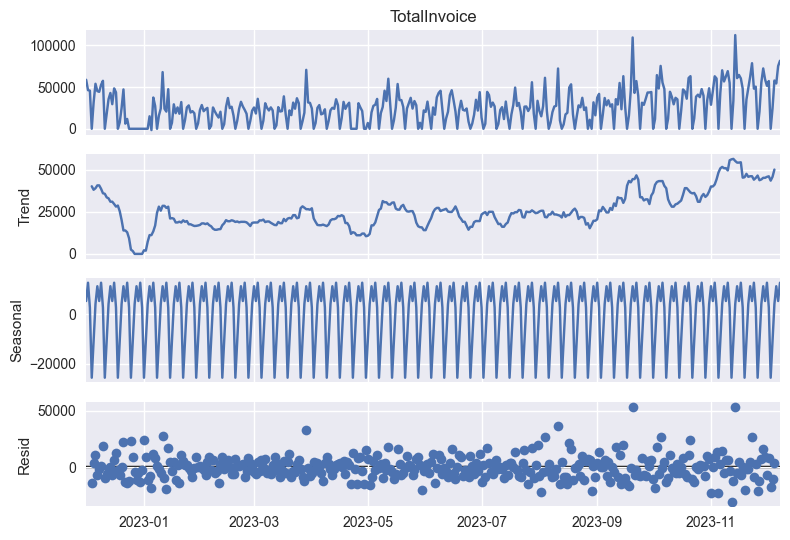

In [27]:
result.plot()
plt.show()

In [28]:
sales_time_series_df['observed'] = result.observed
sales_time_series_df['trend'] = result.trend
sales_time_series_df['seasonal'] = result.seasonal
sales_time_series_df['resid'] = result.resid

sales_time_series_df['match'] = sales_time_series_df['trend'] + sales_time_series_df['seasonal'] + sales_time_series_df['resid'] == sales_time_series_df['observed']
sales_time_series_df.head(10)

print(f"Percentage of matches for additive model: {round(sales_time_series_df[sales_time_series_df['match']].shape[0]/sales_time_series_df.shape[0]*100,2)}")

Percentage of matches for additive model: 83.38


In [29]:
px.line(sales_time_series_df, x=sales_time_series_df.index, y = ['trend'],   template = 'plotly_white')

In [30]:
px.line(sales_time_series_df, x=sales_time_series_df.index, y = ['seasonal'],   template = 'plotly_white')

In [31]:
px.line(sales_time_series_df, x=sales_time_series_df.index, y = ['resid'],  template = 'plotly_white')

### D.1.1 Autocorrelation and  Partial Autocorrelation

<p>The autocorrelation method computes the Pearson correlation between the Series and its shifted self. Below we can see the computation considering 4 different lagd (days shifted)</p>
<p>From the resulta, we can conclude that the best value for the autocorrealtion occurs when the lag is a week (7 days)</p>

In [32]:
print(f"Corretation with lag=1: {sales_time_series_df['TotalInvoice'].autocorr()}")
print(f"Corretation with lag=7: {sales_time_series_df['TotalInvoice'].autocorr(lag=7)}")
print(f"Corretation with lag=30: {sales_time_series_df['TotalInvoice'].autocorr(lag=30)}")
print(f"Corretation with lag=90: {sales_time_series_df['TotalInvoice'].autocorr(lag=90)}")

Corretation with lag=1: 0.42679089550499344
Corretation with lag=7: 0.7042988876112746
Corretation with lag=30: -0.03235470941915657
Corretation with lag=90: 0.1686064614315937


<p>
From the plot balow we can easily see that the autocorrelation (with 95% of confidence) is higher for 7 (highest) and his multiples, and the lowers are for 9+7n, 10+7n, 11+7n and 12+7n (n belonging to positive intenger numbers) lags. This reinforces the weekly seasonality.
</p>

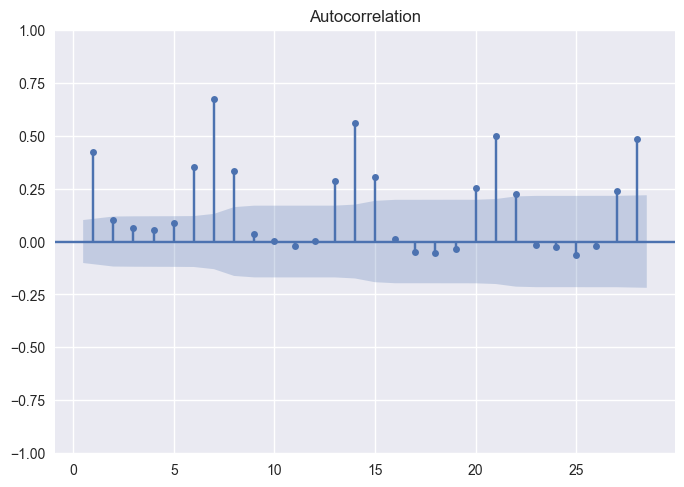

In [33]:
plot_acf(sales_time_series_df['TotalInvoice'], lags = 28, zero= False, alpha=.05)
plt.show()

<p>
From the plot balow we can easily see that the partial autocorrelation (with 95% of confidence) is higher for 7 (highest) and soem of his multiples. However those valeus are low comparing with the autocorelation.</p>

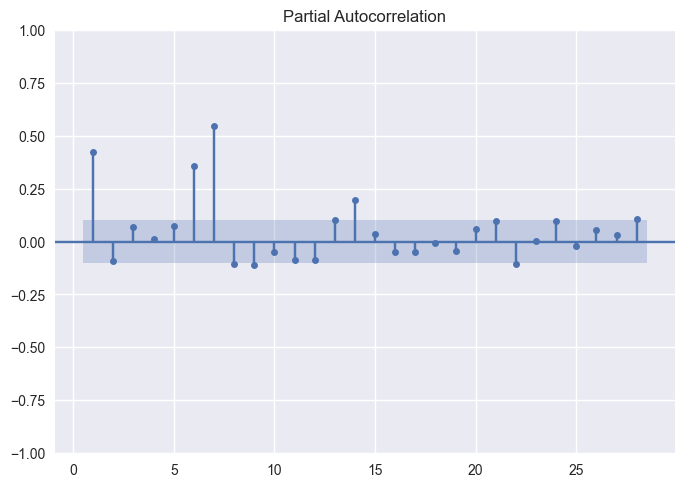

In [34]:
plot_pacf(sales_time_series_df['TotalInvoice'], lags = 28, zero= False, alpha=.05)
plt.show()

## D.2 Stationary Processes

<p style="color:Tomato;font-size:25px">Dickey Fuller test:</p>
<p> <div style="color:Tomato;"> Null Hypothesis (H0): </div> If not rejected, it suggests that there is evidence that the time series has a unit root and, therefore, is non-stationary. It has time-dependent structure.</p>
<p> <div style="color:Tomato;">Alternative Hypothesis (H1): </div> If the null hypothesis is rejected, it suggests that the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.</p>
<p> If the test statistic is more negative than the critical value, you can reject the null hypothesis and conclude that the time series is stationary. If the test statistic is less negative than the critical value, you cannot reject the null hypothesis and conclude that the time series has a unit root.</p>

<p>
In our case, the critical value of the data is higher then the T values corresponding to adfuller test (for 95% confidence), so we can conclude that the Time Series is Non-Stationary.
</p>

In [35]:
result = adfuller(sales_time_series_df['TotalInvoice'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.741349
p-value: 0.409944
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Failed to Reject Ho - Time Series is Non-Stationary


<p>
According to the Mann-Kendall Trend test, the p-value is lower then the threshold(0.5), which means we do have sufficient evidence to say that sample has a trend present.
</p>

In [36]:
import pymannkendall as mk
result = mk.original_test(sales_time_series_df['TotalInvoice'], alpha=0.05)

print('p-value: %f' % result[2])

if result[2] < 0.5:
    print ("Reject Ho -  We fail not to reject the accepted hypothesis i.e. we do have sufficient evidence to say that sample has a trend present.")
else:
    print ("Failed to Reject Ho - We fail to reject the accepted hypothesis i.e. we do have sufficient evidence to say that sample does not have any trend present.")

p-value: 0.000000
Reject Ho -  We fail not to reject the accepted hypothesis i.e. we do have sufficient evidence to say that sample has a trend present.


## D.3 Time Series Evaluation Metrics

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , mean_absolute_percentage_error
from math import sqrt

In [38]:
sales_time_series_df['estimated'] = sales_time_series_df['trend'] + sales_time_series_df['seasonal']
df_matrix = sales_time_series_df[['TotalInvoice', 'estimated']].copy()
df_matrix = df_matrix[df_matrix['estimated'].isna() == False]
df_matrix.head(5)

,TotalInvoice,estimated
2022-12-04,0.00,14389.591966
2022-12-05,31383.95,27483.091743
2022-12-06,53860.18,43064.009074
2022-12-07,45059.05,51974.303716
2022-12-08,44189.84,45983.550043


<p>
Comparing the graphs of total invoice real values and the estamtion, we can see a certain proximity. Howver some estimations are negative, more precisely when the real values are zero. On the periods where we have more consecutive days with zero total invoice (for instance , the end of 2022), the negative values of invoice are lower. For example , on 25 Dec 2022 and 01 Jan 2023, it is estimated a total invoice of around -25k. Probably taking into account christmas holidays would improve the model.
</p>

In [39]:
px.line(df_matrix)

<p>
According to the medtrics calculated below, the performance of the model is not so good. MAE, MSE and RMSE are metrics that depend on the dimension of the variable in analysis, so it's somehow hard to interpret. In other hand, MAPE and sMAPE are scale-independent metrics and easier to interpret. The value found for MAPE Is very high, but according the formula it's understandable because we have a lot of zero values, so, as an alternative, sMAPE was calculated and has the value 59.3%, which represents an high error. 
</p>

In [40]:
print(f"Mean Absolute Error - MAE: {round(mean_absolute_error(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice']),4)}")
print(f"Mean Squared Error - MSE: {round(mean_squared_error(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice']),4)}")
print(f"Root Mean Squared Error - RMSE: {round(sqrt(mean_squared_error(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice'])),4)}")
print(f"R squared - R2: {round(r2_score(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice']),4)}")
print(f"Mean Absolute Percentage Error - MAPE: {round(mean_absolute_percentage_error(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice']),4)}")
print(f"Symmetric Mean Absolute Percentage Error - sMAPE: {round(((abs((df_matrix['TotalInvoice']-df_matrix['estimated']))/((abs(df_matrix['TotalInvoice'])+abs(df_matrix['estimated']))/2)).sum())/df_matrix.shape[0],4)}")

Mean Absolute Error - MAE: 7716.2454
Mean Squared Error - MSE: 109375240.129
Root Mean Squared Error - RMSE: 10458.2618
R squared - R2: 0.7161
Mean Absolute Percentage Error - MAPE: 7.626399903864995e+18
Symmetric Mean Absolute Percentage Error - sMAPE: 0.593


## D.4 Autorreregresive (AR) and Moving Average (MA)

<p> Folow the AR and MA models are developed:</p>
<ul>
<li>The AR model relates the current value of the series to its past values. It assumes that past values have a linear relationship with the current value.</li>
<li>The MA model relates the current value of the series to past white noise or error terms. It captures the shocks or unexpected events in the past that are still affecting the series.</li>
</ul>

In [41]:
from statsmodels.tsa.arima_process import ArmaProcess

In [42]:
sales_ARIMA_df = retail_sales_raw_df[["InvoiceDate_","TotalInvoice"]].groupby(["InvoiceDate_"]).sum()
sales_ARIMA_df.index = pd.DatetimeIndex(sales_ARIMA_df.index)
sales_ARIMA_df = sales_ARIMA_df.reindex(pd.date_range('2022-12-04', '2023-12-08'), fill_value=0)

In [43]:
px.line(sales_ARIMA_df['TotalInvoice'])

### D.4.1 Stationarity test

#### D.4.1.1 Finding the value of d

In [44]:
result_adf_invoice = adfuller(sales_ARIMA_df['TotalInvoice'])
print('ADF Statistic: %f' % result_adf_invoice[0])
print('p-value: %f' % result_adf_invoice[1])
print('Critical Values:')
for key, value in result_adf_invoice[4].items():
    print('\t%s: %.3f' % (key, value))

if result_adf_invoice[1] < 0.05:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.680381
p-value: 0.441248
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Failed to Reject Ho - Time Series is Non-Stationary


In [45]:
sales_ARIMA_df['diff_inv'] = sales_ARIMA_df['TotalInvoice'] - sales_ARIMA_df['TotalInvoice'].shift(1)
sales_ARIMA_df.head()

,TotalInvoice,diff_inv
2022-12-04,0.00,NaN
2022-12-05,31383.95,31383.95
2022-12-06,53860.18,22476.23
2022-12-07,45059.05,-8801.13
2022-12-08,44189.84,-869.21


In [46]:
px.line(sales_ARIMA_df['diff_inv'])

In [47]:
result_diff_invoice = adfuller(sales_ARIMA_df['diff_inv'].dropna())
print('ADF Statistic: %f' % result_diff_invoice[0])
print('p-value: %f' % result_diff_invoice[1])
print('Critical Values:')
for key, value in result_diff_invoice[4].items():
    print('\t%s: %.3f' % (key, value))

if result_diff_invoice[1] < 0.05:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -8.293446
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Reject Ho - Time Series is Stationary


<p>Let's take a look on the 2nd and 3rd differencing orders. Below we can see that in first-order differencing we have fewer noises in the data while after 1st order there is an increase in the noise. So we can select 1st order differencing for our model. We can also verify this using an autocorrelation plot.</p>

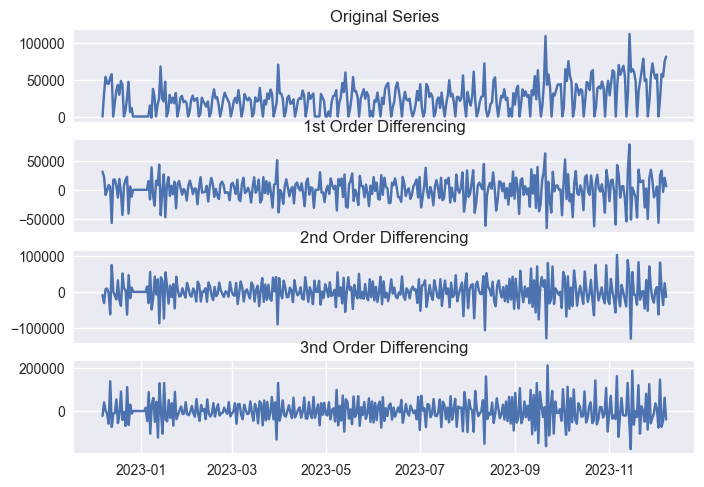

In [48]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(sales_ARIMA_df['TotalInvoice']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax2.plot(sales_ARIMA_df['TotalInvoice'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax3.plot(sales_ARIMA_df['TotalInvoice'].diff().diff()); ax3.set_title('2nd Order Differencing'); ax3.axes.xaxis.set_visible(False)
ax4.plot(sales_ARIMA_df['TotalInvoice'].diff().diff().diff()); ax4.set_title('3nd Order Differencing')
plt.show()

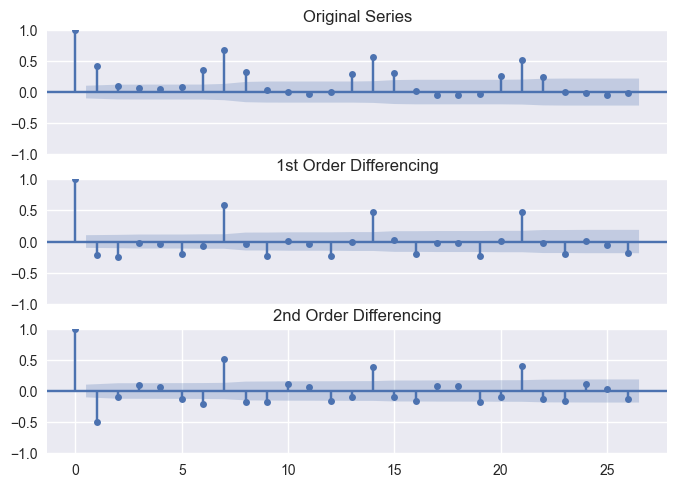

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(sales_ARIMA_df['TotalInvoice'], ax=ax1); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
plot_acf(sales_ARIMA_df['TotalInvoice'].diff().dropna(), ax=ax2); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
plot_acf(sales_ARIMA_df['TotalInvoice'].diff().diff().dropna(), ax=ax3); ax3.set_title('2nd Order Differencing'); 

<p>The p-value is less than 0.05, so we can reject the null hypothesis. This indicates that the difference between each week with the week before is stationary and suggests that a good estimate for the differencing component (d) is 1.</p>

#### D.4.1.2 Finding the value of p

<p> The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part. </p>
<p>Significant correlation in a stationary time series can be represented by adding auto regression terms. Using the PACF plot we can take the order of AR terms to be equal to the lags that can cross a significance limit.</p>

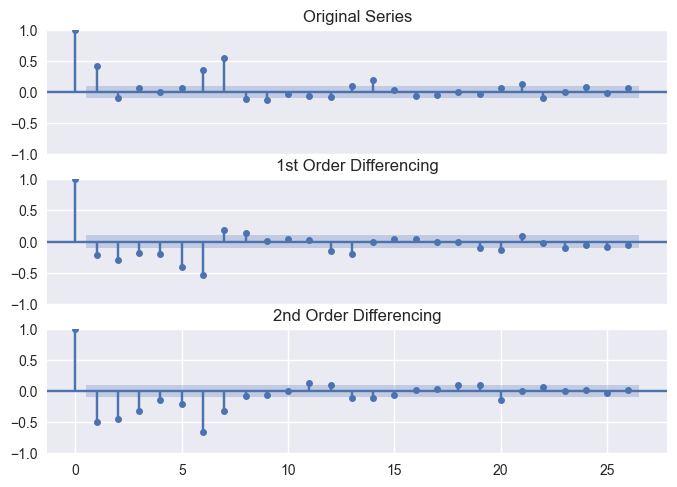

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_pacf(sales_ARIMA_df['TotalInvoice'], ax=ax1); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
plot_pacf(sales_ARIMA_df['TotalInvoice'].diff().dropna(), ax=ax2); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
plot_pacf(sales_ARIMA_df['TotalInvoice'].diff().diff().dropna(), ax=ax3); ax3.set_title('2nd Order Differencing'); 

<p>Looking for the pacf in 1st order diff, it's clearly that within 6 lags the AR is significant, so it will choose a p=6 </p>

#### D.4.1.3 Finding the value of q

<p>To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series</p>

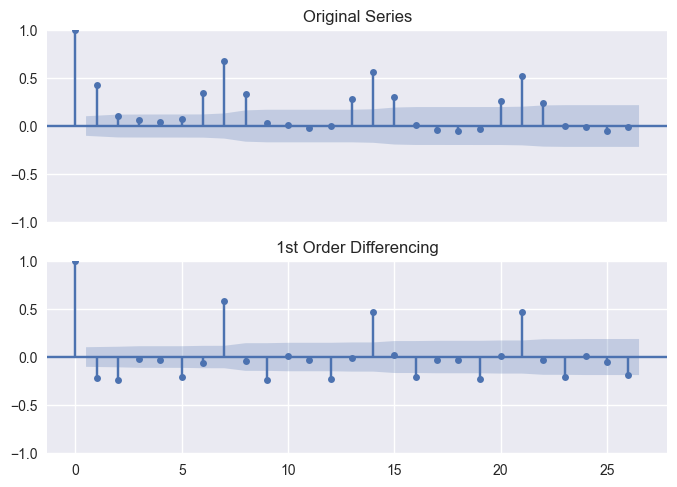

In [51]:
fig, (ax1, ax2) = plt.subplots(2)
plot_acf(sales_ARIMA_df['TotalInvoice'], ax=ax1); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
plot_acf(sales_ARIMA_df['TotalInvoice'].diff().dropna(), ax=ax2); ax2.set_title('1st Order Differencing'); 

<p>Here we can see that 3 of the lags are out of the significance limit so we can say that the optimal value of our q is 3. </p>

#### D.4.1.4 Finding the value of seasonal order parameters (P, D, Q ,s)

<p><strong>Seasonal Autoregressive Order (P):</strong></p>
<p>Our seasonal autoregressive order can be thought about just like our autoregressive order except instead of finding the order of past timesteps that influence the value at the current timestep, we are looking for past timesteps on the order of seasons of m, the seasonal period. This is why the mth lag is also used to determine the value of P. If the lag m has a positive value then P should be >= 1. Otherwise P should be 0. We can fit the model with a value of 1 and increment as we see fit.</p>
<p><strong>Seasonal Difference Order (D):</strong></p>
<p>The rule of thumb for our D parameter is that our series differencing and seasonal differencing should not be greater than 2. If our seasonal pattern is stable overtime then we can set D=1 and set D=0 if the seasonal pattern seems unstable.</p>
<p><strong>Seasonal Moving Average Order (Q):</strong></p>
<p>We determine Q much like we determine P. If the lag m, is negative then Q >= 1- the opposite of how we fit P. We generally do not want P+Q to exceed 2. We want to keep our parameter values low because there is a high risk to overfit as we use increasingly complex models.</p>

In [52]:
sales_ARIMA_df['seas_diff'] = sales_ARIMA_df['TotalInvoice'] - sales_ARIMA_df['TotalInvoice'].shift(7)

In [53]:
px.line(sales_ARIMA_df['seas_diff'])

<p>
As the data seems to exhibit some seasonality, let's estimate the seasonal difference (D). The seasonal difference can be calculated similarly to the "regular difference" (d), taking into account the window (period) in which the seasonal pattern occurs (in that case, 7 days) and subtracting the value from the previous period from the current value.

+ Seasonal difference (T) = Observation (T) - Observation (T-7)

+ First seasonal difference (T) = Seasonal difference (T) - Seasonal difference (T-1)
</p>

In [54]:
result_seas = adfuller((sales_ARIMA_df['seas_diff']).dropna())
print('ADF Statistic: %f' % result_seas[0])
print('p-value: %f' % result_seas[1])
print('Critical Values:')
for key, value in result_seas[4].items():
    print('\t%s: %.3f' % (key, value))

if result_seas[1] < 0.05:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -5.956998
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Reject Ho - Time Series is Stationary


<p>The p-value is less than 0.05, so we can reject the null hypothesis of non-stationarity. This suggests using a value of 0 for D (e.g., no seasonal difference).</p>

<p>So, to start, the values of P, D, Q and s will be 1, 0, 0 and 7.</p>

### D.4.2 Fit the Model

In [55]:
model_sales = SARIMAX(sales_ARIMA_df['TotalInvoice'],order=(6,1,0), seasonal_order=(1, 0, 0, 7))
result_sales = model_sales.fit()
result_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      TotalInvoice   No. Observations:                  370
Model:             SARIMAX(6, 1, 0)x(1, 0, 0, 7)   Log Likelihood               -4035.714
Date:                           Sun, 25 Feb 2024   AIC                           8087.427
Time:                                   21:11:58   BIC                           8118.714
Sample:                               12-04-2022   HQIC                          8099.856
                                    - 12-08-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8004      0.043    -18.587      0.000      -0.885      -0.716
ar.L2         -0.8503      0.036    -23.742      0.000      -0.920      -0.780
ar.L3         -0.8076      0.044    -18.151      0.000      -0.895      -0.720
ar.L4         -0.8065      0.042    -19.224      0.000      -0.889      -0.724
ar.L5         -0.8256      0.035    -23.567      0.000      -0.894      -0.757
ar.L6         -0.7273      0.039    -18.479      0.000      -0.804      -0.650
ar.S.L7       -0.2574      0.058     -4.427      0.000      -0.371      -0.143
sigma2      1.847e+08   1.77e-10   1.04e+18      0.000    1.85e+08    1.85e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.99   Jarque-Bera (JB):               183.05
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.88
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.81e+33. Standard errors may be unstable.
"""

<p>From the results we can see that MA-Ll, L2 e L3 are not statistically significant as their p-values are above the 0.05 threshold.</p>
<p>The Ljung Box test tests that the errors are white noise. The Ljung-Box (L1) (Q) is the LBQ test statistic at lag 1 is, the Prob(Q) is 0.03, and the p-value is 0.86. Since the probability is above 0.05, we can’t reject the null that the errors are white noise.</p>
<p>Heteroscedasticity tests that the error residuals are homoscedastic or have the same variance. The summary performs White’s test. Our summary statistics show a test statistic of 1.43 and a p-value of 0.05, which means we reject the null hypothesis and our residuals show variance. This variance poses forecasting problems.</p>

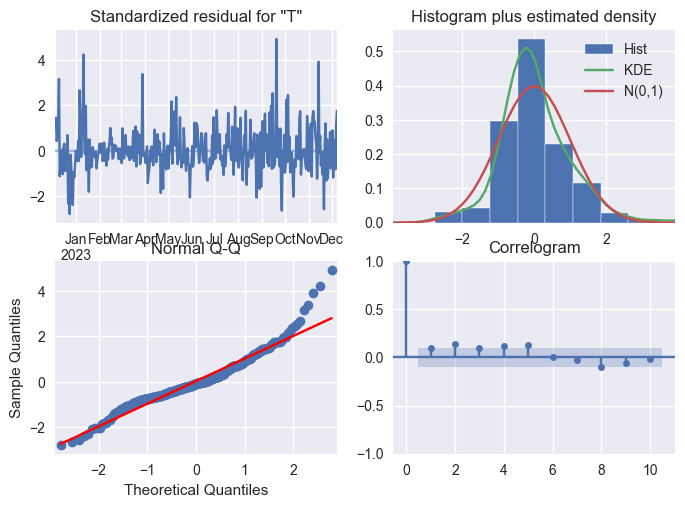

In [56]:
result_sales.plot_diagnostics()
plt.show()  

<p>Standardized residual: There are no obvious patterns in the residuals. This is our case which points out to a good model;</p>
<p>Histogram plus kde estimate: The histogram shows the measured distribution of the residuals while the green line shows the KDE curve (smoothed version of the histogram). The red line shows a normal distribution. For a good model the green line should be similar to the red line. The green curve is not very similar to the red one;</p>
<p>Correlogram or ACF plot: 95% of correlations for lag greater than one should not be significant (inside the blue area). This is also the case, i.e., good model;</p>
<p>Normal Q-Q: Most of the data points should lie on the straight line, indicating a normal distribution of the residuals. This doesn't happen for greater values.</p>

### D.4.3 Prediction

In [57]:
new_dates_test = pd.date_range('2023-12-08', freq = 'D', periods=90)
df_pred = pd.DataFrame(pd.to_datetime(new_dates_test))
df_pred.columns = ['Day']
df_pred.set_index('Day', inplace = True)
df_pred['TotalInvoice'] = np.nan
df_pred.rename_axis(None, inplace=True)
df_pred = df_pred.sort_index(ascending=True)
df_pred.index.freq = 'D'   

In [58]:
df_now_after = pd.concat([sales_ARIMA_df,df_pred])

<Axes: >

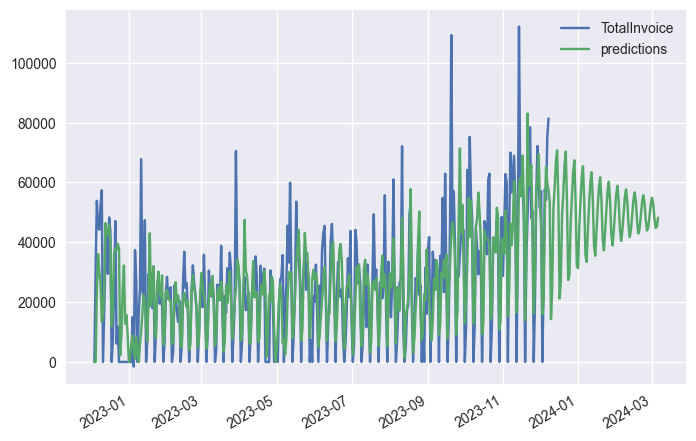

In [59]:
df_now_after['predictions'] = result_sales.predict(start=0,end=374+90)
df_now_after[['TotalInvoice','predictions']].plot()

### D.4.4 Evaluation

In [60]:
df_now_after_clean = df_now_after[~(df_now_after['diff_inv'].isna()) & ~(df_now_after['predictions'].isna())]
print(f"Mean Squared Error - MSE: {round(mean_squared_error(df_now_after_clean['TotalInvoice'], df_now_after_clean['predictions'], squared = False),4)}")
print(f"Root Mean Squared Error - RMSE: {round(sqrt(mean_squared_error(df_now_after_clean['TotalInvoice'], df_now_after_clean['predictions'], squared = False)),4)}")
print(f"Mean Absolute Percentage Error - MAPE: {round(mean_absolute_percentage_error(y_pred = df_now_after_clean['predictions'], y_true = df_now_after_clean['TotalInvoice']),4)}")
print(f"Symmetric Mean Absolute Percentage Error - sMAPE: {round(((abs((df_now_after_clean['TotalInvoice']-df_now_after_clean['predictions']))/((abs(df_now_after_clean['TotalInvoice'])+abs(df_now_after_clean['predictions']))/2)).sum())/df_matrix.shape[0],4)}")

Mean Squared Error - MSE: 13690.2972
Root Mean Squared Error - RMSE: 117.0055
Mean Absolute Percentage Error - MAPE: 8.193057856292554e+18
Symmetric Mean Absolute Percentage Error - sMAPE: 0.6644


### D.4.5 Auto ARIMA

In [61]:
auto_arima_pax = auto_arima(sales_ARIMA_df['TotalInvoice'],
                       start_P=1,
                       start_q=0,
                       max_p=6,
                       max_q=3,
                       m=7,
                       seasonal=True,
                       D=0,
                       max_d = 3,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
auto_arima_pax.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=8166.947, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=8405.330, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=8240.809, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=8226.118, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=8403.371, Time=0.14 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=8263.425, Time=0.56 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=8210.880, Time=1.40 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=8168.314, Time=3.25 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=8167.941, Time=1.94 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=8354.853, Time=0.15 sec
 ARIMA(2,1,0)(0,0,2)[7] intercept   : AIC=8239.696, Time=0.77 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=8194.991, Time=0.98 sec
 ARIMA(2,1,0)(2,0,2)[7] intercept   : AIC=8169.143, Time=1.00 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=8187.799, Time=1.58 sec
 ARIMA(3,1,0)(1,0,1)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  370
Model:             SARIMAX(6, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -4012.295
Date:                             Sun, 25 Feb 2024   AIC                           8042.589
Time:                                     21:13:51   BIC                           8077.787
Sample:                                 12-04-2022   HQIC                          8056.571
                                      - 12-08-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7200      0.063    -11.511      0.000      -0.843      -0.597
ar.L2         -0.6122      0.076     -8.012      0.000      -0.762      -0.462
ar.L3         -0.4761      0.081     -5.910      0.000      -0.634      -0.318
ar.L4         -0.3543      0.077     -4.606      0.000      -0.505      -0.204
ar.L5         -0.2546      0.064     -3.955      0.000      -0.381      -0.128
ar.L6         -0.2091      0.059     -3.533      0.000      -0.325      -0.093
ar.S.L7        0.9951      0.006    171.345      0.000       0.984       1.007
ma.S.L7       -0.9005      0.045    -19.985      0.000      -0.989      -0.812
sigma2      1.847e+08   1.33e-10   1.39e+18      0.000    1.85e+08    1.85e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               154.51
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.72e+33. Standard errors may be unstable.
"""

#### D.4.5.1 Fit the Model

In [62]:
model_auto = SARIMAX(sales_ARIMA_df['TotalInvoice'],order=(6, 1, 0),
              seasonal_order=(1, 0, 0, 7),
              enforce_stationarity=False,
              enforce_invertibility=False)
results_auto_arima = model_auto.fit()
results_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      TotalInvoice   No. Observations:                  370
Model:             SARIMAX(6, 1, 0)x(1, 0, 0, 7)   Log Likelihood               -3887.546
Date:                           Sun, 25 Feb 2024   AIC                           7791.092
Time:                                   21:13:51   BIC                           7822.092
Sample:                               12-04-2022   HQIC                          7803.423
                                    - 12-08-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8141      0.045    -18.071      0.000      -0.902      -0.726
ar.L2         -0.8592      0.037    -23.362      0.000      -0.931      -0.787
ar.L3         -0.8151      0.045    -18.193      0.000      -0.903      -0.727
ar.L4         -0.8222      0.045    -18.403      0.000      -0.910      -0.735
ar.L5         -0.8326      0.039    -21.454      0.000      -0.909      -0.757
ar.L6         -0.7292      0.040    -18.206      0.000      -0.808      -0.651
ar.S.L7       -0.2550      0.059     -4.340      0.000      -0.370      -0.140
sigma2      1.847e+08   1.82e-10   1.01e+18      0.000    1.85e+08    1.85e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.10   Jarque-Bera (JB):               197.53
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             0.87
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+33. Standard errors may be unstable.
"""

In [63]:
forecast_auto_arima = results_auto_arima.predict(start = len(sales_ARIMA_df),
                           end=len(sales_ARIMA_df)+90,
                           typ='levels').rename('forecast_auto_arima')

c:\Users\gonca\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



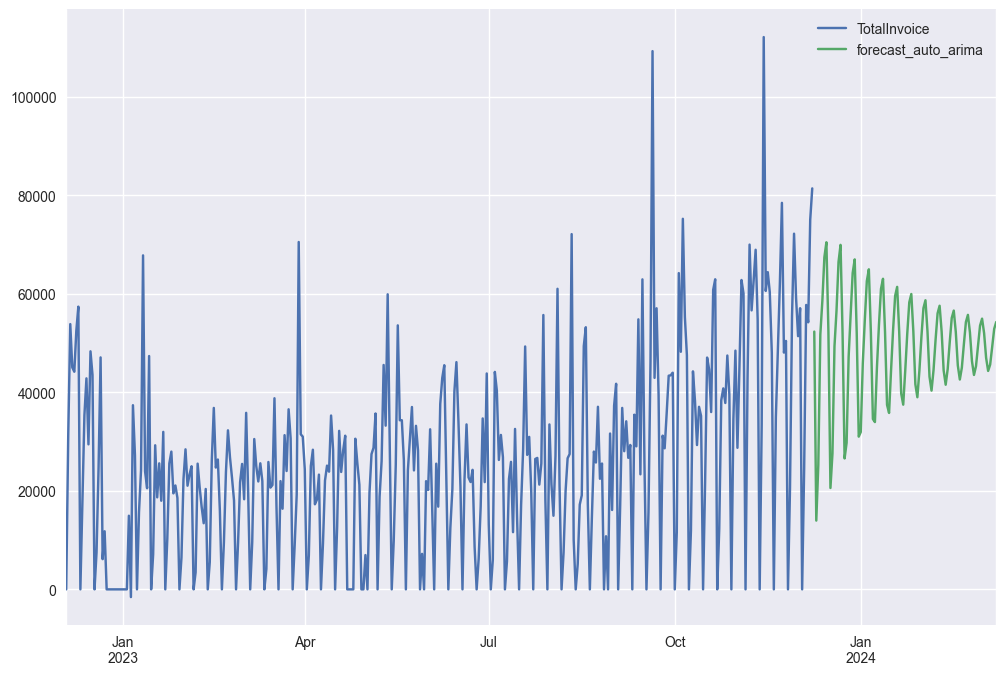

In [64]:
sales_ARIMA_df['TotalInvoice'].plot(figsize=(12,8),legend=True)
forecast_auto_arima.plot(legend=True)
plt.show()

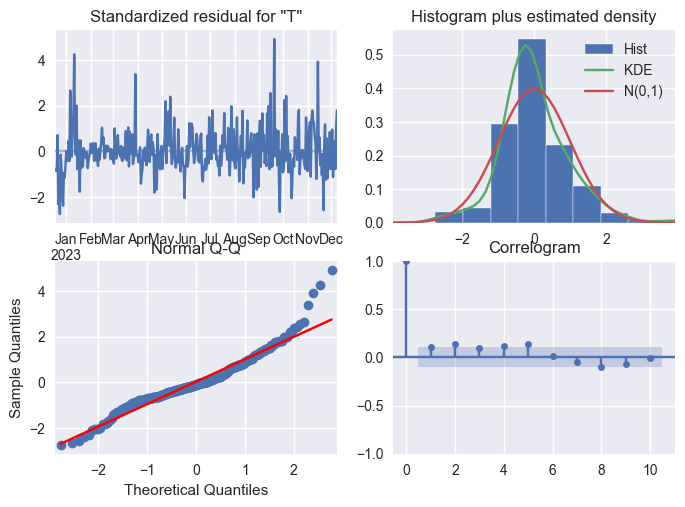

In [65]:
diag = results_auto_arima.plot_diagnostics()

#### D.4.5.2 Prediction

In [66]:
new_dates_test = pd.date_range('2023-12-08', freq = 'D', periods=90)
df_pred = pd.DataFrame(pd.to_datetime(new_dates_test))
df_pred.columns = ['Day']
df_pred.set_index('Day', inplace = True)
df_pred['TotalInvoice'] = np.nan
df_pred.rename_axis(None, inplace=True)
df_pred = df_pred.sort_index(ascending=True)
df_pred.index.freq = 'D'   

In [67]:
df_now_after = pd.concat([sales_ARIMA_df,df_pred])

<Axes: >

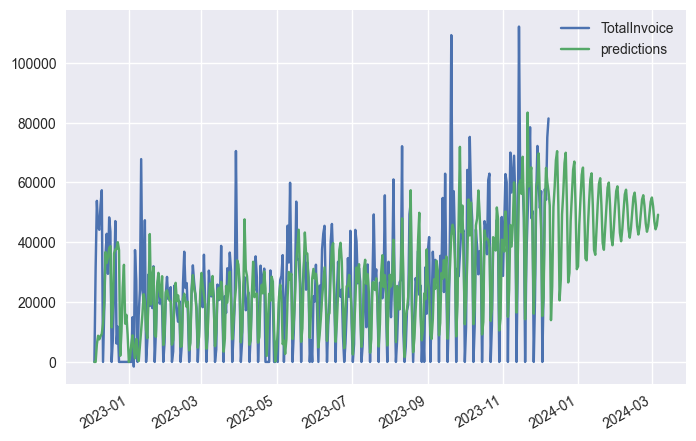

In [68]:
df_now_after['predictions'] = results_auto_arima.predict(start=0,end=374+90)
df_now_after[['TotalInvoice','predictions']].plot()

In [69]:
df_now_after_clean = df_now_after[~(df_now_after['diff_inv'].isna()) & ~(df_now_after['predictions'].isna())]
print(f"Mean Squared Error - MSE: {round(mean_squared_error(df_now_after_clean['TotalInvoice'], df_now_after_clean['predictions'], squared = False),4)}")
print(f"Root Mean Squared Error - RMSE: {round(sqrt(mean_squared_error(df_now_after_clean['TotalInvoice'], df_now_after_clean['predictions'], squared = False)),4)}")
print(f"Mean Absolute Percentage Error - MAPE: {round(mean_absolute_percentage_error(y_pred = df_now_after_clean['predictions'], y_true = df_now_after_clean['TotalInvoice']),4)}")
print(f"Symmetric Mean Absolute Percentage Error - sMAPE: {round(((abs((df_now_after_clean['TotalInvoice']-df_now_after_clean['predictions']))/((abs(df_now_after_clean['TotalInvoice'])+abs(df_now_after_clean['predictions']))/2)).sum())/df_matrix.shape[0],4)}")

Mean Squared Error - MSE: 14185.8984
Root Mean Squared Error - RMSE: 119.1046
Mean Absolute Percentage Error - MAPE: 8.069694191197875e+18
Symmetric Mean Absolute Percentage Error - sMAPE: 0.6738


<p>
The results for the ARIMA Model are far from the ideal, the error are high and the predictions for the next 90 days doesn't seem to be accurate.
</p>

## D.5 Prophet

<p> Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast. </p>

In [70]:
sales_prophet = sales_ARIMA_df[['TotalInvoice']].dropna()
sales_prophet = sales_prophet.rename(columns = {'TotalInvoice':'y'})
sales_prophet['ds'] = sales_prophet.index
sales_prophet.reset_index(drop=True, inplace=False)

sales_prophet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370 entries, 2022-12-04 to 2023-12-08
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       370 non-null    float64       
 1   ds      370 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.8 KB


### D.5.1 Fit the Model

In [71]:
phm = Prophet()
phm.fit(sales_prophet)

21:13:54 - cmdstanpy - INFO - Chain [1] start processing
21:13:54 - cmdstanpy - INFO - Chain [1] done processing


### D.5.2 Forecasts

In [72]:
future_df = phm.make_future_dataframe(periods=90, freq='D')
future_df.tail()

,ds
455,2024-03-03
456,2024-03-04
457,2024-03-05
458,2024-03-06
459,2024-03-07


<p> The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.</p>

In [73]:
forecast_df = phm.predict(future_df)

display(forecast_df.head(2))
display(forecast_df.tail(2))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-04,18244.349327,-23073.650287,7577.518864,18244.349327,18244.349327,-25678.997955,-25678.997955,-25678.997955,-25678.997955,-25678.997955,-25678.997955,0.0,0.0,0.0,-7434.648628
1,2022-12-05,18262.288774,-9653.370027,23312.857978,18262.288774,18262.288774,-10556.056554,-10556.056554,-10556.056554,-10556.056554,-10556.056554,-10556.056554,0.0,0.0,0.0,7706.232220


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
458,2024-03-06,64148.714283,58917.265122,91111.789968,62673.477797,65609.606428,11181.723285,11181.723285,11181.723285,11181.723285,11181.723285,11181.723285,0.0,0.0,0.0,75330.437568
459,2024-03-07,64336.139788,53222.254324,85967.176380,62829.156344,65826.141428,5617.226699,5617.226699,5617.226699,5617.226699,5617.226699,5617.226699,0.0,0.0,0.0,69953.366487


In [74]:
forecast_clean_df = forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_clean_df.tail(3)

,ds,yhat,yhat_lower,yhat_upper
457,2024-03-05,68098.450117,52150.972955,84486.041809
458,2024-03-06,75330.437568,58917.265122,91111.789968
459,2024-03-07,69953.366487,53222.254324,85967.176380


 ### D.5.3 Plot the results

In [75]:
plot_plotly(phm, forecast_df)

 ### D.5.4 Descomposing the results


c:\Users\gonca\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\gonca\AppData\Local\Temp\ipykernel_9660\2661925926.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



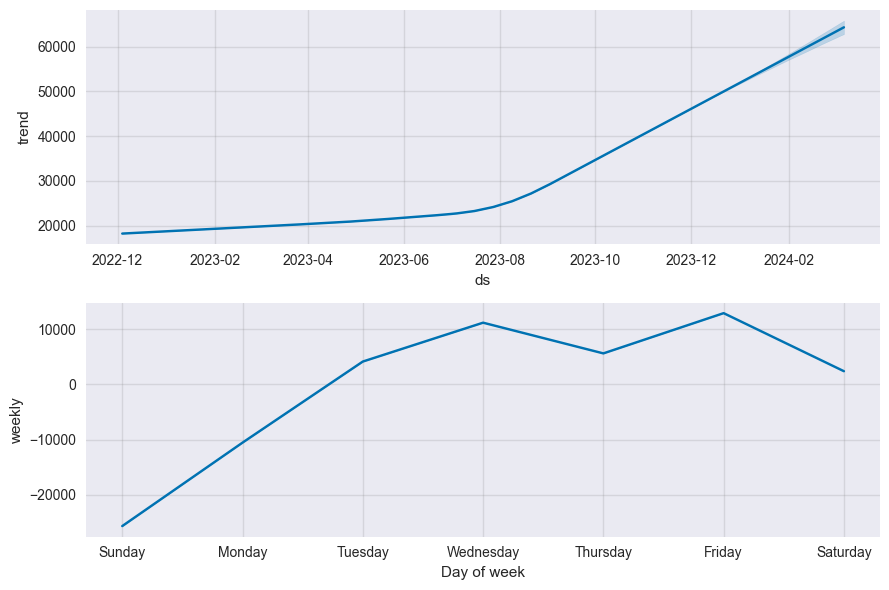

In [76]:
fig3 = phm.plot_components(forecast_df)
fig3.show()

<p>
As we already saw, the variation along each week suggests that the values are lower for Sundays and higher foe Wednesdays and Fridays.</p>

### D.5.5 Evaluating the predictions: train and test split

In [77]:
train_df = sales_prophet.loc[sales_prophet['ds'] < '2023-08-20']
test_df = sales_prophet.loc[sales_prophet['ds'] >= '2023-08-20']

print(f"Percentage of Train Dataframe {round(train_df.shape[0]/sales_prophet.shape[0]*100,2)}")
print(f"Percentage of Test Dataframe {round(test_df.shape[0]/sales_prophet.shape[0]*100,2)}")

Percentage of Train Dataframe 70.0
Percentage of Test Dataframe 30.0


In [78]:
model_ml = Prophet(interval_width = 0.95, weekly_seasonality = True)
model_ml.fit(train_df)

21:13:56 - cmdstanpy - INFO - Chain [1] start processing
21:13:56 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
future_ml_df = model_ml.make_future_dataframe(periods =len(test_df)+90, freq = 'D')
future_ml_df.tail(10)

,ds
450,2024-02-27
451,2024-02-28
452,2024-02-29
453,2024-03-01
454,2024-03-02
455,2024-03-03
456,2024-03-04
457,2024-03-05
458,2024-03-06
459,2024-03-07


In [80]:
forecast_ml_df = model_ml.predict(future_ml_df)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_ml_df.tail(10)

,ds,yhat,yhat_lower,yhat_upper
450,2024-02-27,28573.827587,6892.256587,50736.977745
451,2024-02-28,37755.048168,15307.919787,59323.277477
452,2024-02-29,30760.143392,8587.834786,52394.207202
453,2024-03-01,39595.861088,18162.514398,61774.099146
454,2024-03-02,27675.853841,7109.296609,48329.751990
455,2024-03-03,6209.015124,-14378.456801,30275.376582
456,2024-03-04,17876.958844,-3367.249151,39226.545222
457,2024-03-05,28704.273997,7167.898869,51710.259260
458,2024-03-06,37885.494578,16455.914345,60031.326025
459,2024-03-07,30890.589802,9061.593963,52421.084133


In [81]:
px.line(pd.concat([sales_prophet.set_index('ds')['y'], forecast_ml_df.set_index('ds')['yhat']], axis = 1),
        title = 'Forecasts with Prophet | Additive seasonality')

### D.5.6 Adding Multiplicative Seasonality

In [82]:
model_mul_ml = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True)
model_mul_ml.fit(sales_prophet)

21:13:57 - cmdstanpy - INFO - Chain [1] start processing
21:13:57 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
future_mul_ml_df = model_mul_ml.make_future_dataframe(90, freq='D')

In [84]:
forecast_mul_ml_df = model_mul_ml.predict(future_mul_ml_df)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
px.line(pd.concat([sales_prophet.set_index('ds')['y'], forecast_mul_ml_df.set_index('ds')['yhat']], axis = 1), title = 'Forecasts with Prophet | Multiplicative seasonality')

In [85]:
sk.skim(forecast_mul_ml_df.loc[forecast_mul_ml_df['ds'] >= '2023-12-08'])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 91     │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0       ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ yhat           │   0 │      0 │   56000 │   28000 │     -320 │  37000 │  66000 │  76000 │   94000 │ ▃▁▂▃▇▃ │  │
│ │ yhat_lower     │   0 │      0 │   41000 │   28000 │   -16000 │  22000 │  51000 │  60000 │   79000 │ ▃ ▂▃▇▃ │  │
│ │ yhat_upper     │   0 │      0 │   72000 │   28000 │    13000 │  51000 │  82000 │  91000 │  110000 │ ▃ ▂▂▇▃ │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴──────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ ds                     │      0 │         0 │     2023-12-08      │     2024-03-07      │ D                │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### D.5.6.1 Evaluation (Cross validation)

<p>For the cross validation, it was considered a initial date 180 days after the 1st date (04-12-2022), a period of 10 days and an horizon of 75 days.</p>

In [86]:
import datetime as dt
end_date = dt.datetime.strptime("2022/12/04", "%Y/%m/%d") + dt.timedelta(days=180)

fig4 = px.line(forecast_ml_df.set_index('ds')['yhat'],
        title = 'Additive seasonality')

fig4.add_vline(x=end_date, line_width=3, line_dash="dash", line_color="red")
fig4.add_vline(x=end_date+dt.timedelta(days=75), line_width=3, line_dash="dash", line_color="red")
fig4.show()

In [87]:
cv_add = cross_validation(model = model_ml, initial='180 days', period='10 days', horizon = '75 days')

  0%|          | 0/1 [00:00<?, ?it/s]21:13:57 - cmdstanpy - INFO - Chain [1] start processing
21:13:57 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


In [88]:
cv_mul = cross_validation(model = model_mul_ml,  initial='180 days', period='10 days', horizon = '75 days')

  0%|          | 0/12 [00:00<?, ?it/s]21:13:58 - cmdstanpy - INFO - Chain [1] start processing
21:13:58 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 1/12 [00:00<00:03,  3.65it/s]21:13:58 - cmdstanpy - INFO - Chain [1] start processing
21:13:58 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 2/12 [00:00<00:02,  3.45it/s]21:13:58 - cmdstanpy - INFO - Chain [1] start processing
21:13:58 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 3/12 [00:00<00:02,  3.60it/s]21:13:59 - cmdstanpy - INFO - Chain [1] start processing
21:13:59 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 4/12 [00:01<00:02,  3.52it/s]21:13:59 - cmdstanpy - INFO - Chain [1] start processing
21:13:59 - cmdstanpy - INFO - Chain [1] done processing
 42%|████▏     | 5/12 [00:01<00:01,  3.63it/s]21:13:59 - cmdstanpy - INFO - Chain [1] start processing
21:13:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 6/12 [00:01<00:01,  3.73it/s]21:13:59

#### D.5.6.2 Display results from cross validation

<p>
Looking for the metric values in the cross validation table, we can see that multiplicative and additive models have similar performance in terms of MDAPE and SMAPE values, which are around 37% and 60%, respectively. However the RSME e higher or the multiplicative model. An MDAPE error of 37% is between 20% and 50%, so it's considered to be ok (not bad, but also not great) and it's a metric less sensitive to outliears comparing to SMAPE.
</p>

In [89]:
df_performance_add = performance_metrics(cv_add)
print(df_performance_add["rmse"].mean())
print(df_performance_add["mdape"].mean())
print(df_performance_add["smape"].mean())

10575.70728432912
0.37766277608928545
0.5938712493312824


In [90]:
df_performance_mul = performance_metrics(cv_mul)
print(df_performance_mul["rmse"].mean())
print(df_performance_mul["mdape"].mean())
print(df_performance_mul["smape"].mean())

16529.977155105782
0.37051774460360887
0.6293986043198945


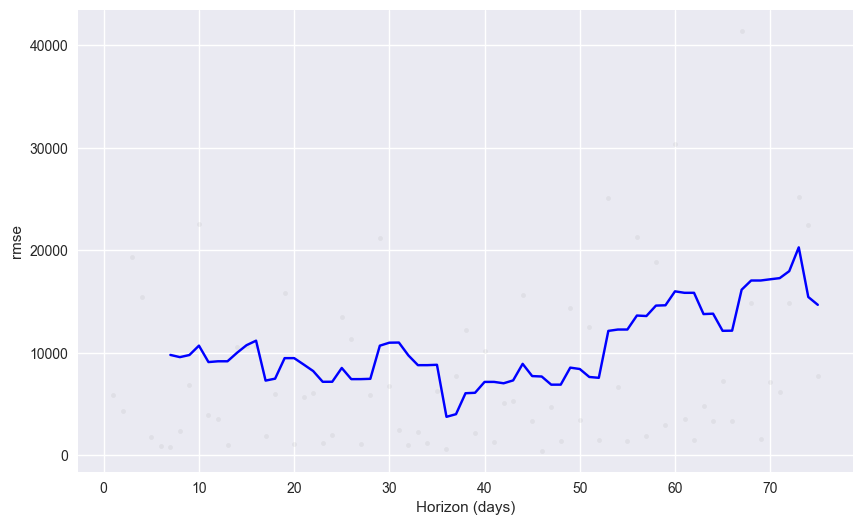

In [91]:
cv_plot = plot_cross_validation_metric(cv_add, metric = 'rmse')

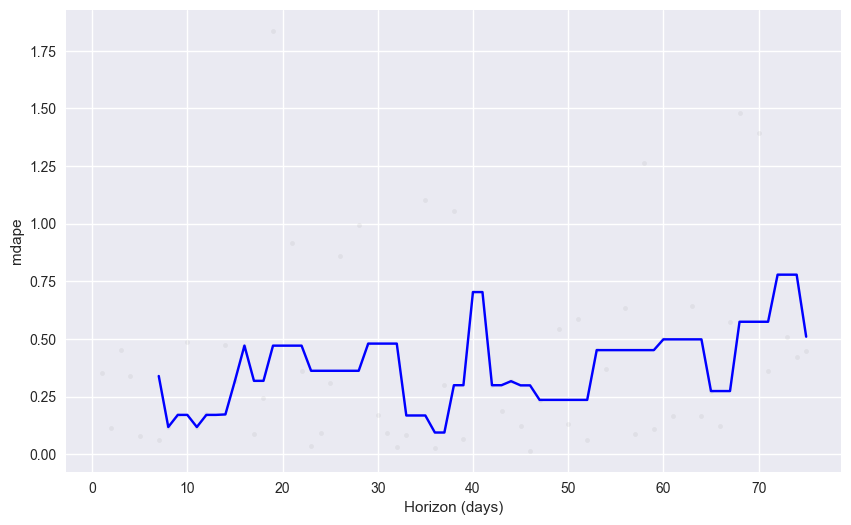

In [92]:
cv_plot = plot_cross_validation_metric(cv_add, metric = 'mdape')

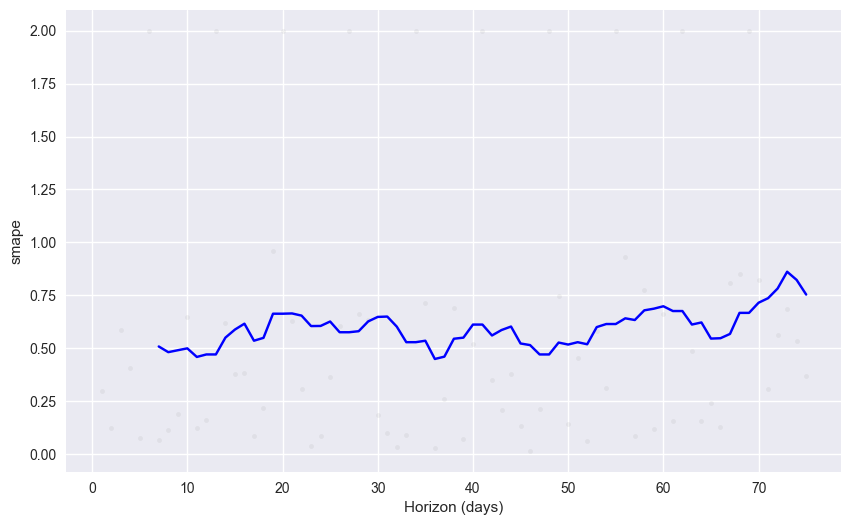

In [93]:
cv_plot = plot_cross_validation_metric(cv_add, metric = 'smape')

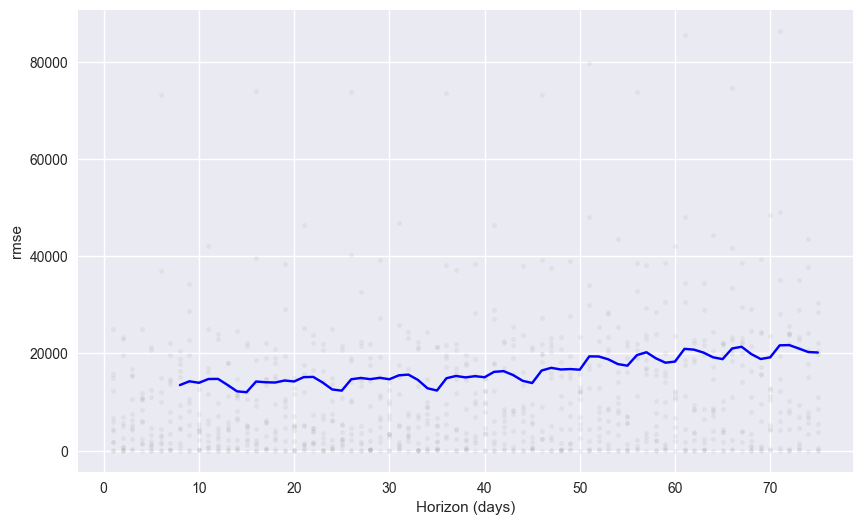

In [94]:
cv_plot_mul = plot_cross_validation_metric(cv_mul, metric = 'rmse')

In [95]:
df_performance_add.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizon,69,41 days 00:00:00,20 days 01:29:51.588764639,7 days 00:00:00,24 days 00:00:00,41 days 00:00:00,58 days 00:00:00,75 days 00:00:00
mse,69.0,125181003.422422,87501128.713986,14198867.666973,57351850.160927,90124043.473887,185021466.134705,412147063.702492
rmse,69.0,10575.707284,3678.522524,3768.138488,7573.100433,9493.368395,13602.259597,20301.405461
mae,69.0,7786.237649,2589.203392,2946.119691,5855.583373,7123.382677,9314.554686,15899.150832
mdape,69.0,0.377663,0.16771,0.093879,0.235478,0.361667,0.479623,0.778653
smape,69.0,0.593871,0.087837,0.448608,0.527989,0.599283,0.649113,0.860948
coverage,69.0,0.931677,0.083475,0.714286,0.857143,1.0,1.0,1.0


In [96]:
df_performance_mul.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizon,68,41 days 12:00:00,19 days 18:34:09.402235840,8 days 00:00:00,24 days 18:00:00,41 days 12:00:00,58 days 06:00:00,75 days 00:00:00
mse,68.0,280750498.046389,94105084.076115,144890160.746563,208135648.308043,241348101.031624,363002873.137838,472050326.146913
rmse,68.0,16529.977155,2760.878144,12037.032888,14426.88421,15535.36324,19052.425461,21726.719176
mae,68.0,11156.785646,2118.451429,8360.373619,9410.362247,10238.171395,13095.926213,15177.888054
mdape,68.0,0.370518,0.025367,0.322677,0.349536,0.367234,0.39183,0.427817
smape,68.0,0.629399,0.032475,0.573721,0.602738,0.623558,0.660324,0.685073
coverage,68.0,0.672712,0.076354,0.544444,0.597222,0.694444,0.738889,0.8


#### D.5.6.3 Comments

- Two different specifications of the model have been evaluated: one specification that added additive seasonality and one that added multiplicative seasonality.

- As can be seen from the projection graphs with each type of seasonality, the additive seasonality ~model shows a strictly better fit to the training and test samples, but none of the two models had a resonable performance.

- Furthermore, this result is confirmed for the results derived from cross-validation, where the mean of all error metrics considered decreases compared to the results with multiplicative seasonality. Additionally, the dispersion (variance) for Additive Model is higher, indicating more uncertainty in the outcome comparing with the Multiplicative Model.

### D.5.7 Adding Calendar Specifics

#### D.5.7.1 Fit the Model

In [97]:
model_yearly_ml = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model_yearly_ml.fit(sales_prophet)

21:14:03 - cmdstanpy - INFO - Chain [1] start processing
21:14:03 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
sales_yearly_future = model_yearly_ml.make_future_dataframe(periods=90)
sales_yearly_future.tail()

,ds
455,2024-03-03
456,2024-03-04
457,2024-03-05
458,2024-03-06
459,2024-03-07


In [99]:
forecast_yearly = model_yearly_ml.predict(sales_yearly_future)
forecast_yearly.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-04,20073.034408,-1094.427303,28280.669759,20073.034408,20073.034408,-6879.581995,-6879.581995,-6879.581995,-25849.296440,-25849.296440,-25849.296440,18969.714445,18969.714445,18969.714445,0.0,0.0,0.0,13193.452413
1,2022-12-05,20103.604561,13285.056967,43094.488683,20103.604561,20103.604561,7975.389087,7975.389087,7975.389087,-10673.764088,-10673.764088,-10673.764088,18649.153174,18649.153174,18649.153174,0.0,0.0,0.0,28078.993647
2,2022-12-06,20134.174713,27884.695673,55364.763114,20134.174713,20134.174713,22260.054260,22260.054260,22260.054260,4074.685697,4074.685697,4074.685697,18185.368563,18185.368563,18185.368563,0.0,0.0,0.0,42394.228974


In [100]:
px.line(pd.concat([sales_prophet.set_index('ds')['y'], forecast_yearly.set_index('ds')['yhat']], axis = 1), title = 'Forecasts with Prophet | Yearly seasonality')

In [101]:
plot_plotly(model_yearly_ml, forecast_yearly)

#### D.5.7.2 Descomposing the time series

In [102]:
plot_components_plotly(model_yearly_ml, forecast_yearly)

#### D.5.7.3 Split cross validation

In [103]:
cv_yearly = cross_validation(model = model_yearly_ml, initial='180 days', period='10 days', horizon = '75 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/12 [00:00<?, ?it/s]21:14:04 - cmdstanpy - INFO - Chain [1] start processing
21:14:04 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 1/12 [00:00<00:03,  3.40it/s]21:14:04 - cmdstanpy - INFO - Chain [1] start processing
21:14:04 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 2/12 [00:00<00:02,  3.44it/s]21:14:05 - cmdstanpy - INFO - Chain [1] start processing
21:14:05 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 3/12 [00:00<00:02,  3.51it/s]21:14:05 - cmdstanpy - INFO - Chain [1] start processing
21:14:05 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 4/12 [00:01<00:02,  3.31it/s]21:14:05 - cmdstanpy - INFO - Chain [1] start processing
21:14:05 - cmdstanpy - INFO - Chain [1] done processing
 42%|████▏     | 5/12 [00:01<00:02,  3.35it/s]21:14:06 - cmdstanpy - INFO - Chain [1] start processing
21:14:

<p>
As we can see below, in general the performance of the model with yearly seasonality is worst comparing with multiplicative and additive mmodels above: the mean of all metrics is high, even being the standard deviation quite similar. If we analyse the plots we can easily see that the predictions is not fitting well the real data.</p>

In [104]:
yearly_m_performance = performance_metrics(cv_yearly)
yearly_m_performance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
horizon,68,41 days 12:00:00,19 days 18:34:09.402235840,8 days 00:00:00,24 days 18:00:00,41 days 12:00:00,58 days 06:00:00,75 days 00:00:00
mse,68.0,1955634385.387531,1216678896.225747,521294570.639166,1074358712.345865,1494699181.500139,2307056665.151762,4718607605.488051
rmse,68.0,42276.874771,13069.513724,22831.876196,32775.819988,38661.168444,48031.034877,68692.121859
mae,68.0,30009.886915,8084.891243,16326.483296,23967.48555,28824.50205,34914.029418,45527.383802
mdape,68.0,0.680484,0.151141,0.457447,0.593287,0.632484,0.742636,1.149123
smape,68.0,0.948137,0.080999,0.726931,0.907286,0.973745,1.015707,1.04232
coverage,68.0,0.388562,0.058778,0.305556,0.348611,0.388889,0.401389,0.572222


#### D.5.7.4 Adding holidays

<p>
Below a dataframe with custom holidays, to test the effect of considering sundays as holidays, as well as, the days between 25-Dec and 01-Jan. However this wasn not considered as long as the final results were very compromised</p>

In [105]:
sundays = pd.DataFrame({
    'holiday': 'sundays',
    'ds': pd.to_datetime(sales_prophet[sales_prophet["ds"].dt.day_name()=='Sunday'].ds),
    'lower_window': 0,#siempre va con estos valores
    'upper_window': 1,
})

xmasWeek = pd.DataFrame({
    'holiday': 'xmasweek',
    'ds': pd.to_datetime(['2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31']),
    'lower_window': 0,
    'upper_window': 1,
})

holidays_custom = pd.concat((sundays, xmasWeek))

In [106]:
model_holidays_ml = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True).add_country_holidays(country_name='UK')
model_holidays_ml.fit(sales_prophet)

21:14:08 - cmdstanpy - INFO - Chain [1] start processing
21:14:08 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
sales_holidays_future = model_holidays_ml.make_future_dataframe(periods=90)
forecast_holidays = model_holidays_ml.predict(sales_holidays_future)
forecast_holidays.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-04,20085.594212,-1299.077711,27443.763878,20085.594212,20085.594212,0.0,0.0,0.0,0.0,...,-26679.434568,-26679.434568,-26679.434568,19327.437152,19327.437152,19327.437152,0.0,0.0,0.0,12733.596796
1,2022-12-05,20115.246783,14150.227371,42843.463667,20115.246783,20115.246783,0.0,0.0,0.0,0.0,...,-10807.830893,-10807.830893,-10807.830893,19004.921092,19004.921092,19004.921092,0.0,0.0,0.0,28312.336983
2,2022-12-06,20144.899354,29475.088410,57815.117882,20144.899354,20144.899354,0.0,0.0,0.0,0.0,...,4388.253170,4388.253170,4388.253170,18526.122826,18526.122826,18526.122826,0.0,0.0,0.0,43059.275350


In [108]:
px.line(pd.concat([sales_prophet.set_index('ds')['y'], forecast_holidays.set_index('ds')['yhat']], axis = 1), title = 'Forecasts with Prophet | Yearly seasonality')

In [109]:
plot_plotly(model_holidays_ml, forecast_holidays)

In [110]:
plot_components_plotly(model_holidays_ml, forecast_holidays)

In [111]:
cv_holidays = cross_validation(model = model_holidays_ml, initial='180 days', period='10 days', horizon = '75 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/12 [00:00<?, ?it/s]21:14:09 - cmdstanpy - INFO - Chain [1] start processing
21:14:09 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 1/12 [00:00<00:03,  3.25it/s]21:14:10 - cmdstanpy - INFO - Chain [1] start processing
21:14:10 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 2/12 [00:00<00:03,  2.94it/s]21:14:10 - cmdstanpy - INFO - Chain [1] start processing
21:14:10 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 3/12 [00:01<00:03,  2.82it/s]21:14:10 - cmdstanpy - INFO - Chain [1] start processing
21:14:11 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 4/12 [00:01<00:02,  2.75it/s]21:14:11 - cmdstanpy - INFO - Chain [1] start processing
21:14:11 - cmdstanpy - INFO - Chain [1] done processing
 42%|████▏     | 5/12 [00:01<00:02,  2.83it/s]21:14:11 - cmdstanpy - INFO - Chain [1] start processing
21:14:

## E. Conclusions

In [112]:
holidays_performance = performance_metrics(cv_holidays)

add_model_performance = pd.DataFrame([
             round(mean_squared_error(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice']),4),
             round(sqrt(mean_squared_error(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice'])),4),
                round(mean_absolute_error(y_pred = df_matrix['estimated'], y_true = df_matrix['TotalInvoice']),4), 0,
                round(((abs((df_matrix['TotalInvoice']-df_matrix['estimated']))/((abs(df_matrix['TotalInvoice'])+abs(df_matrix['estimated']))/2)).sum())/df_matrix.shape[0],4)
                        ], index = ["mse","rmse","mae","mdape","smape"])
sarimax_model_performance = pd.DataFrame([
             round(mean_squared_error(df_now_after_clean['TotalInvoice'], df_now_after_clean['predictions'], squared = False),4),
             round(sqrt(mean_squared_error(df_now_after_clean['TotalInvoice'], df_now_after_clean['predictions'], squared = False)),4),
                round(mean_absolute_error(y_pred = df_now_after_clean['predictions'], y_true = df_now_after_clean['TotalInvoice']),4), 0,
                round(((abs((df_now_after_clean['TotalInvoice']-df_now_after_clean['predictions']))/((abs(df_now_after_clean['TotalInvoice'])+abs(df_now_after_clean['predictions']))/2)).sum())/df_now_after_clean.shape[0],4)
                        ], index = ["mse","rmse","mae","mdape","smape"])

models_mean=pd.concat([add_model_performance, sarimax_model_performance, df_performance_add.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"mean"],
                        df_performance_mul.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"mean"],
                        yearly_m_performance.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"mean"],
                        holidays_performance.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"mean"]], axis =1
                      )
models_mean.columns = ["Additive Model", "SARIMAX Model", "Prophet Additive Seas", "Prophet Multiplicative Seas","Prophet Yearly Seas", "Prophet Holidays"]
models_mean.head()


,Additive Model,SARIMAX Model,Prophet Additive Seas,Prophet Multiplicative Seas,Prophet Yearly Seas,Prophet Holidays
mse,1.093752e+08,14185.8984,125181003.422422,280750498.046389,1955634385.387531,1259816017.447847
rmse,1.045826e+04,119.1046,10575.707284,16529.977155,42276.874771,34929.682294
mae,7.716245e+03,10027.5822,7786.237649,11156.785646,30009.886915,27005.338044
mdape,0.000000e+00,0.0000,0.377663,0.370518,0.680484,0.753239
smape,5.930000e-01,0.6702,0.593871,0.629399,0.948137,1.010162


In [113]:
models_std=pd.concat([df_performance_add.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"std"],
                        df_performance_mul.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"std"],
                        yearly_m_performance.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"std"],
                        holidays_performance.describe().transpose().loc[["mse","rmse","mae","mdape","smape"],"std"]], axis =1)
models_std.columns = ["Prophet Additive Seas", "Prophet Multiplicative Seas","Prophet Yearly Seas", "Prophet Holidays"]
models_std.head()

,Prophet Additive Seas,Prophet Multiplicative Seas,Prophet Yearly Seas,Prophet Holidays
mse,87501128.713986,94105084.076115,1216678896.225747,448410815.884988
rmse,3678.522524,2760.878144,13069.513724,6350.302891
mae,2589.203392,2118.451429,8084.891243,4312.82219
mdape,0.16771,0.025367,0.151141,0.105851
smape,0.087837,0.032475,0.080999,0.077545


In [114]:
models_cov=pd.concat([df_performance_add.describe().transpose().loc[["coverage"],"mean"],
                        df_performance_mul.describe().transpose().loc[["coverage"],"mean"],
                        yearly_m_performance.describe().transpose().loc[["coverage"],"mean"],
                        holidays_performance.describe().transpose().loc[["coverage"],"mean"]], axis =1)
models_cov.columns = ["Prophet Additive Seas", "Prophet Multiplicative Seas","Prophet Yearly Seas", "Prophet Holidays"]
models_cov.head()

,Prophet Additive Seas,Prophet Multiplicative Seas,Prophet Yearly Seas,Prophet Holidays
coverage,0.931677,0.672712,0.388562,0.298203


<p>
Looking to the metrics of tables above, one can conclude that, in general, all the models have a bad performance and need improvements.
</p>
<p>
However we can see that the SARIMAX Model has the lower MSE and RMSE, but visually, the predictions doesn't seem to be so accurate. The Model that have better balance between performance, according to the metrics, and the visual representation are the Additive and Prophet Additive Seasonally Models. On another hand, the Models with the worst performance are the Prophet with the yearly seonality and the Propeht with the holidays considered.
</p>
<p>
In the future , it would be interesting to study more some models' parameters and seasonality, as well the effect of days with zero total invoice. Considering only UK customers could be another interesting study.
</p>
<p>
In the end, besides needing some improvements, I would choose the Additive Model for predicting better the total daily invoice.
</p>